<class 'numpy.ndarray'>
float64
[ 0.  1.  2.  3.  4.  5.]
[ 0.1  0.9  2.1  3.1  4.5  5.1]
[[ 55.  15.]
 [ 15.   6.]]   <class 'numpy.ndarray'>
[ 57.9  15.8]   <class 'numpy.ndarray'>   (2,)


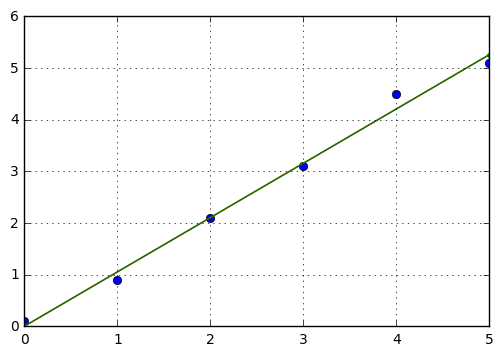

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize
def f(coeff, x, y):
    d=(y-coeff[0]*x-coeff[1])
    return d

x=[]
y=[]
with open('datafitlin.dat', 'r') as fp:
    data = fp.readlines()
    for line in data:
        [xl, yl] = line.split()
        x.append(float(xl))
        y.append(float(yl))
fp.closed 

#x=np.array(x) # array (by default) will make a copy of the object, while asarray will not unless necessary.
#y=np.array(y)
x=np.asarray(x)
y=np.asarray(y)
print(type(x))
print(x.dtype)
plt.figure()
plt.plot(x, y, 'o')

print(x)
print(y)
guest=(0, 0)

res = optimize.leastsq(f, guest[:], args=(x, y))
#print(type(res))
xfit=np.linspace(0, 5, 2, endpoint=True) 
yfit=res[0][0]*xfit+res[0][1]
plt.plot(xfit, yfit, 'r-')


# Approche implementation moindre carrée sous forme syslin
un=np.ones_like(x)
A=np.vstack((x, un))
R=A.dot(A.T)
#print(R.shape)
b=A.dot(y)
print(R, ' ', type(R))
print(b, ' ', type(b), ' ', b.shape)
coeff=np.linalg.solve(R, b)
yfit2=coeff[0]*xfit+coeff[1]
plt.plot(xfit, yfit2, 'g.-')
plt.grid()
plt.show()

In [24]:
help(optimize.leastsq)

Help on function leastsq in module scipy.optimize.minpack:

leastsq(func, x0, args=(), Dfun=None, full_output=0, col_deriv=0, ftol=1.49012e-08, xtol=1.49012e-08, gtol=0.0, maxfev=0, epsfcn=None, factor=100, diag=None)
    Minimize the sum of squares of a set of equations.
    
    ::
    
        x = arg min(sum(func(y)**2,axis=0))
                 y
    
    Parameters
    ----------
    func : callable
        should take at least one (possibly length N vector) argument and
        returns M floating point numbers. It must not return NaNs or
        fitting might fail.
    x0 : ndarray
        The starting estimate for the minimization.
    args : tuple, optional
        Any extra arguments to func are placed in this tuple.
    Dfun : callable, optional
        A function or method to compute the Jacobian of func with derivatives
        across the rows. If this is None, the Jacobian will be estimated.
    full_output : bool, optional
        non-zero to return all optional outputs.


In [76]:
print(res)

(array([ 1.02018134,  0.02995163]), 3)
